# Cloning the repository

## Gerar SSH 

Precisa adicionar o código gerado na última célula na conta do github para funcionar (settings -> SSH and GPG Keys -> New SSH key)

In [ ]:
!ssh-keygen -t rsa -b 4096

In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

In [ ]:
!cat /root/.ssh/id_rsa.pub

## Clonar e entrar na pasta do repositório

In [ ]:
!git clone git@github.com:robert-abc/helsinki.git --branch development

In [5]:
%cd helsinki

/content/helsinki


# Gerar resultados

In [6]:
!python main.py examples/input examples/output 15

1 images were found.
2021-09-28 04:17:20.778240: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 04:17:21.250781: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 04:17:21.251635: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 04:17:21.252947: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 04:17:21.253739: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful 

In [7]:
!python main.py examples/input examples/output 15 --extension png

1 images were found.
2021-09-28 04:29:51.504597: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 04:29:51.517249: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 04:29:51.518072: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 04:29:51.519390: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 04:29:51.520247: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful 

In [8]:
!python main.py examples/input examples/output 15

1 images were found.
2021-09-28 04:42:47.861840: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 04:42:47.878534: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 04:42:47.879467: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 04:42:47.880836: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 04:42:47.881688: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful 

# Visualização dos resultados

In [59]:
from utils import process
import os
import re
import matplotlib.pyplot as plt

In [53]:
gt_name=os.listdir('examples/groundTruth')
in_name=os.listdir('examples/input')
out_name=os.listdir('examples/output')

r=re.compile(".*tif|.*png")

gt_name=list(filter(r.match,gt_name))
in_name=list(filter(r.match,in_name))
out_name=list(filter(r.match,out_name))

gt_name.sort()
in_name.sort()
out_name.sort()

In [54]:
img_list=[]

for i in range(len(gt_name)):
  ground,_,_=process.load_img(os.path.join('examples/groundTruth',gt_name[i]),width=512,enforse_div32='EXTEND')
  input,_,_=process.load_img(os.path.join('examples/input',in_name[i]),width=512,enforse_div32='EXTEND')
  output,_,_=process.load_img(os.path.join('examples/output',out_name[i]),width=512,enforse_div32='EXTEND')

  img_list.append([ground,input,output])

In [55]:
def multiplot(imgs,titles=['Ground Truth','Input','Output']):
  plt.figure(figsize=[16,8])
  for i in range(len(imgs)):
    plt.subplot(1,3,i+1)
    plt.imshow(imgs[i][0],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i])

plt.show();

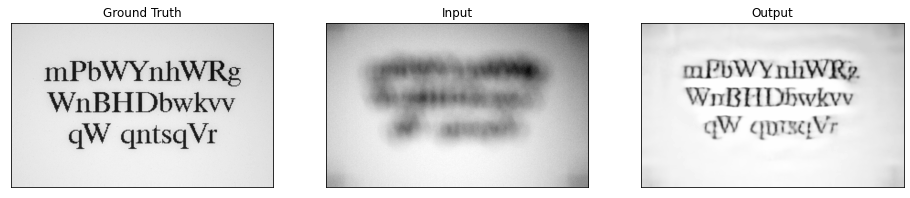

In [56]:
# Times New Roman
multiplot(img_list[0])

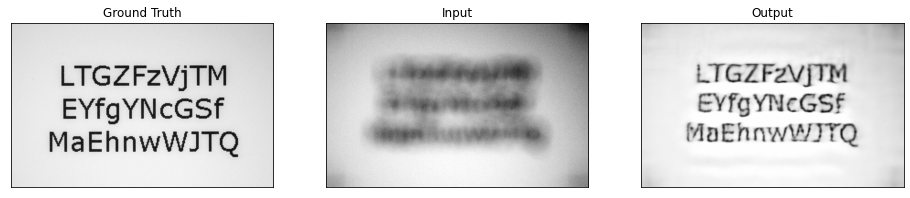

In [57]:
# Verdana
multiplot(img_list[1])

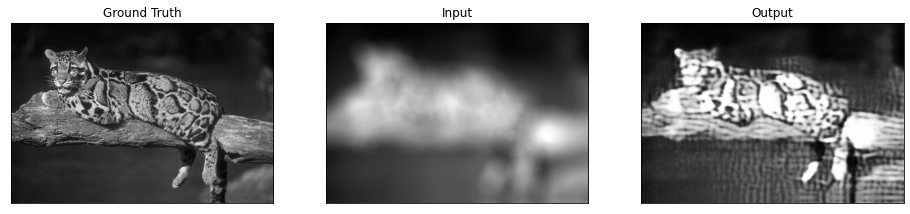

In [58]:
# Sanity Check
multiplot(img_list[2])